# **Forcasting** **EDA**

---





In [114]:
#import All libraries here
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import scipy
import seaborn as sns
from pickle import dump

In [115]:
# importing all files here
df=pd.read_excel('CO2 dataset.xlsx')


In [116]:
temp=pd.read_csv('GlobalLandTemperatures_GlobalTemperatures.csv')

# Section 1: Checking Data info



In [117]:
df

,Year,CO2
0,1800,0.00568
1,1801,0.00561
2,1802,0.00555
3,1803,0.00548
4,1804,0.00542
...,...,...
210,2010,15.60000
211,2011,15.60000
212,2012,14.80000
213,2013,14.70000


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    215 non-null    int64  
 1   CO2     215 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 3.5 KB


**IN DATASET WE ARE SEEING THAT THERE ARE TWO COLUMNS YEAR AND CO2. BOTH COLUMNS HAVE 215 DATA AND THERE DATATYPES ARE FLOAT**

# SECTION 2: CHECKING DATATYPES

In [119]:
df.dtypes

Year      int64
CO2     float64
dtype: object

**AS WE SEE YEAR IS A Date VARIALBLE AND WE DONT WRITE YEAR IN DECIMALS SO WE ARE CONVERTING YEAR INTO DATE DATATYPE IN THE FORMAT OF YEAR**

In [120]:
df['Year']=pd.to_datetime(df['Year'],format='%Y')

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Year    215 non-null    datetime64[ns]
 1   CO2     215 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.5 KB


In [122]:
df=df.set_index('Year')

In [123]:
df

,CO2
Year,
1800-01-01,0.00568
1801-01-01,0.00561
1802-01-01,0.00555
1803-01-01,0.00548
1804-01-01,0.00542
...,...
2010-01-01,15.60000
2011-01-01,15.60000
2012-01-01,14.80000


**We have set year column As a index**

# SECTION 3: CHECKING MISSING VALUES


In [124]:
df.isnull().sum()

CO2    0
dtype: int64

**IN OUR DATASET THERE ARE NO MISSING VALUES SO**

# SECTION 4: CHECKING DUPICATES VALUES

In [125]:
df.duplicated().sum()

45

**THERE ARE 45 REPEATED VALUES IN THE DATA MEANS IN THIS 45 YEAR SAME AMOUNT OF CORBON IS ESTIMATED**

# SECTION 5: DATA DISTRIBUTION

In [126]:
df.describe()

,CO2
count,215.000000
mean,6.741970
std,6.522437
min,0.001750
25%,0.041050
50%,6.390000
75%,11.500000
max,18.200000


Skewness of Feature is 0.3602005014929277
Kurtosis of Feature is -1.4123040100331175


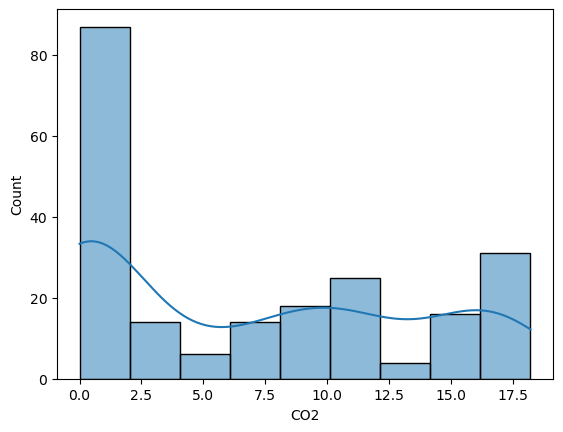

In [127]:
sns.histplot(x='CO2',data=df,kde=True)
print('Skewness of Feature is',scipy.stats.skew(df.CO2,bias=True))
print('Kurtosis of Feature is',scipy.stats.kurtosis(df.CO2,bias=True))

<AxesSubplot:xlabel='Year'>

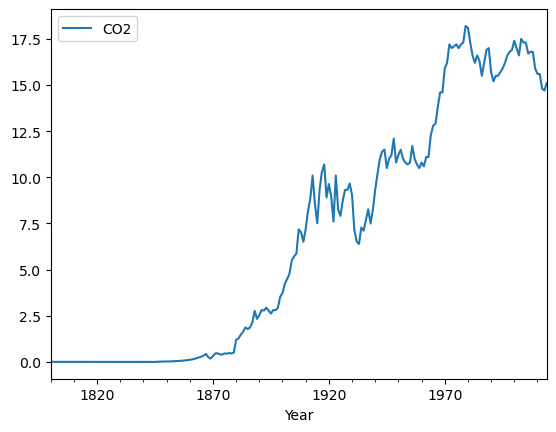

In [128]:
df.plot()

As we see in the Plot and Graph the co2 is increase so much after 1870 <br>
The data having positive Skewness<br>
And its have Negative Kurtosis

# Section 6: Outliers

**Box plot Method**

<AxesSubplot:>

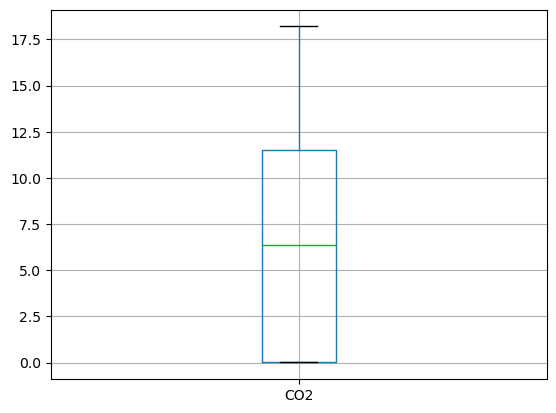

In [129]:
df.boxplot(column='CO2')

**Z-Scores methods**

In [130]:
z_scores = np.abs(df['CO2'] - df['CO2'].mean()) / df['CO2'].std(ddof=0)

In [131]:
outliers = df[z_scores > 3]

In [132]:
outliers

,CO2
Year,


**IQR - method**

In [133]:
q1 = df['CO2'].quantile(0.25)
q3 = df['CO2'].quantile(0.75)
iqr = q3 - q1

In [134]:
outliers = df[(df['CO2'] < q1 - 1.5*iqr) | (df['CO2'] > q3 + 1.5*iqr)]

In [135]:
outliers

,CO2
Year,


for testing outliers we use box plot method, IQR method and Z-scores method we get result that there is no outliers in our dataset

# Section 7:Trend Analysis

In [136]:
rolling_mean = df['CO2'].rolling(window=10).mean()
rolling_std = df['CO2'].rolling(window=10).std()

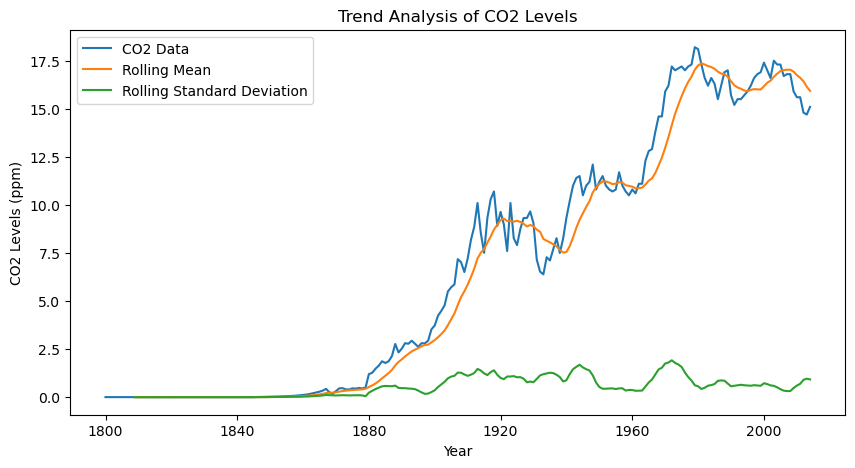

In [137]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df['CO2'], label='CO2 Data')
ax.plot(rolling_mean, label='Rolling Mean')
ax.plot(rolling_std, label='Rolling Standard Deviation')
ax.legend(loc='best')
ax.set_xlabel('Year')
ax.set_ylabel('CO2 Levels (ppm)')
ax.set_title('Trend Analysis of CO2 Levels')
plt.show()

 we calculate the rolling mean and standard deviation using a window size of 10 years. We then plot the CO2 data, rolling mean, and standard deviation on a single graph using matplotlib.

By examining the plot, we can observe the overall direction of the CO2 data over time and identify any trends. In this example, we can see that the CO2 data has an upward trend over time.

# Section 8: Seosonality Analysis

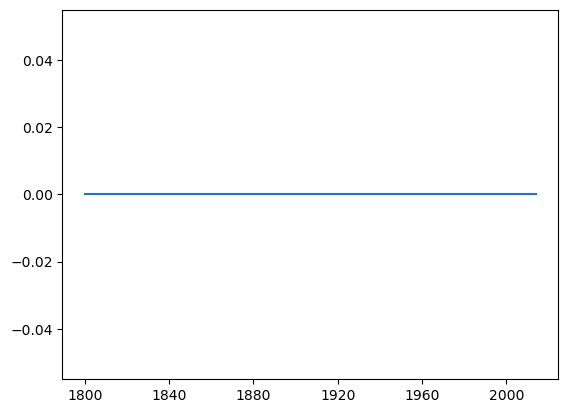

0


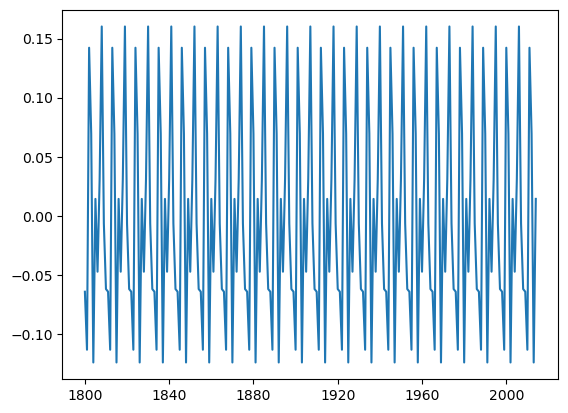

10


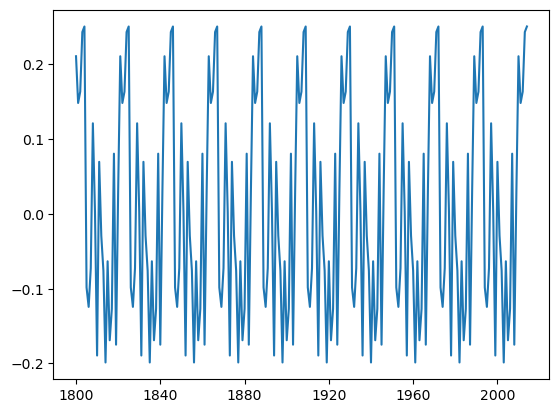

20


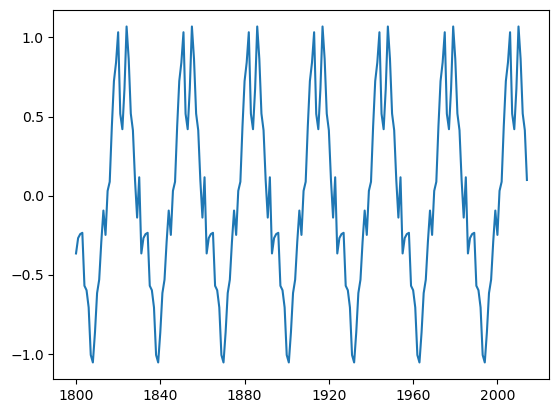

30


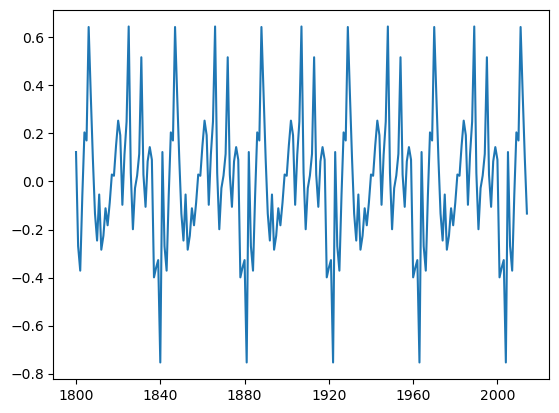

40


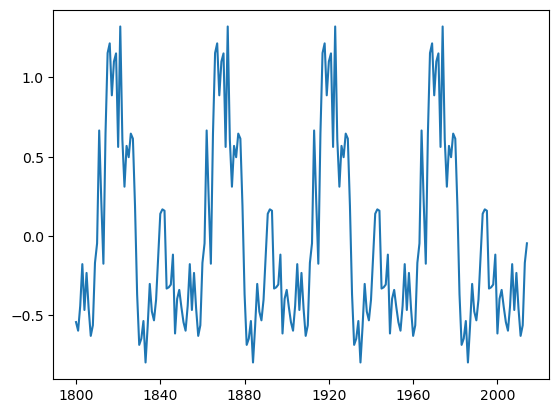

50


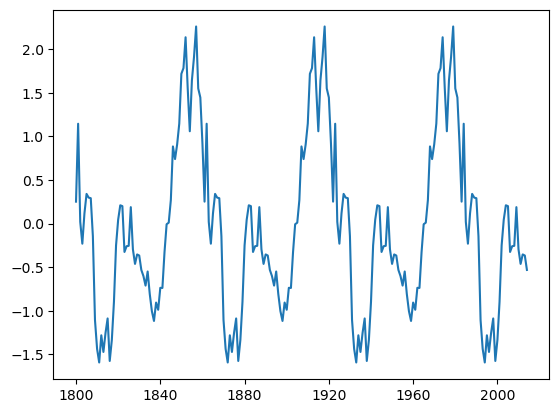

60


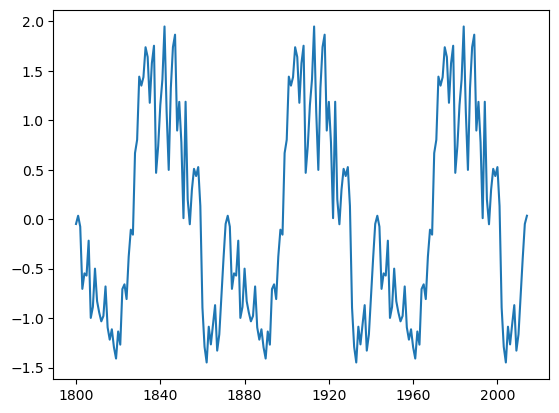

70


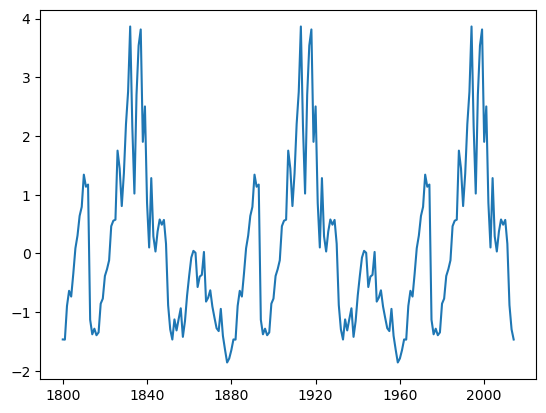

80


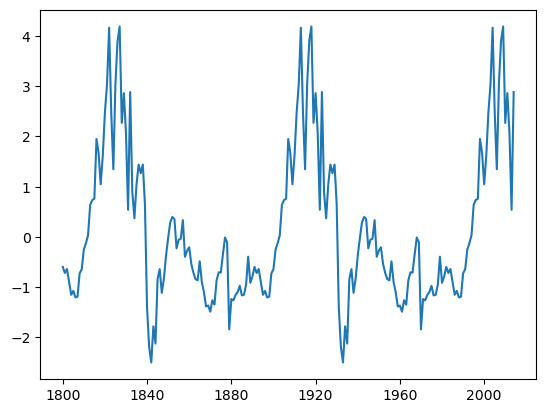

90


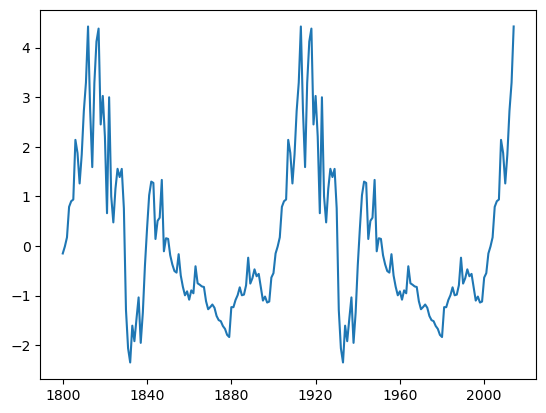

100


In [138]:
for i in range(0,101,10):
  decomposition = seasonal_decompose(df['CO2'], model='additive', period=i+1)
  seasonality = decomposition.seasonal
  plt.plot(seasonality)
  plt.show()
  print(i)

We have plotted different plots to Identify its seasonality And we find That data have one seasonality for every period

# Section 9: Stationary Analysis

In [139]:
result = adfuller(df['CO2'])

In [140]:
print('ADF statistic:', result[0])
print('p-value:', result[1])

ADF statistic: -0.37846277515588705
p-value: 0.9136330950336237


We then use the adfuller function from the statsmodels library to perform the ADF test for stationarity. The test returns a test statistic and a p-value. If the p-value is below a certain threshold (e.g., 0.05), we can reject the null hypothesis of non-stationarity and conclude that the time series is stationary.

And by seeing the result we get that the data is stationary

# Section 10: Correlation

As we see we dont have more that one features in our dataset and for correlation we have minimum two features. thats why we are comparing our data with similar types of features and checking how much impact they get if Co2 is increase or decrease<br>

**We are checking relation between temperature and Co2**

In [141]:
temp=temp[["dt","LandAverageTemperature"]]

In [142]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   dt                      3192 non-null   object 
 1   LandAverageTemperature  3180 non-null   float64
dtypes: float64(1), object(1)
memory usage: 50.0+ KB


In [143]:
temp['dt']=pd.to_datetime(temp['dt'],format="%Y-%m")

In [144]:
temp.dtypes

dt                        datetime64[ns]
LandAverageTemperature           float64
dtype: object

In [145]:
temp.set_index('dt',inplace=True)

In [146]:
temp

,LandAverageTemperature
dt,
1750-01-01,3.034
1750-02-01,3.083
1750-03-01,5.626
1750-04-01,8.490
1750-05-01,11.573
...,...
2015-08-01,14.755
2015-09-01,12.999
2015-10-01,10.801


In [147]:
temp=temp.resample('Y').mean()

In [148]:
temp

,LandAverageTemperature
dt,
1750-12-31,8.719364
1751-12-31,7.976143
1752-12-31,5.779833
1753-12-31,8.388083
1754-12-31,8.469333
...,...
2011-12-31,9.516000
2012-12-31,9.507333
2013-12-31,9.606500


In [149]:
temp=temp[(temp.index.year>=1800)&(temp.index.year<2015)]

In [150]:
co2_yearly_df = pd.DataFrame({'Year': df.index.year, 'CO2': df['CO2'].values})
temp_yearly_df = pd.DataFrame({'Year': temp.index.year, 'Temperature': temp['LandAverageTemperature'].values})
merged_df = pd.merge(co2_yearly_df, temp_yearly_df, on='Year')
merged_df=merged_df.drop(columns=['Year'],axis=1)

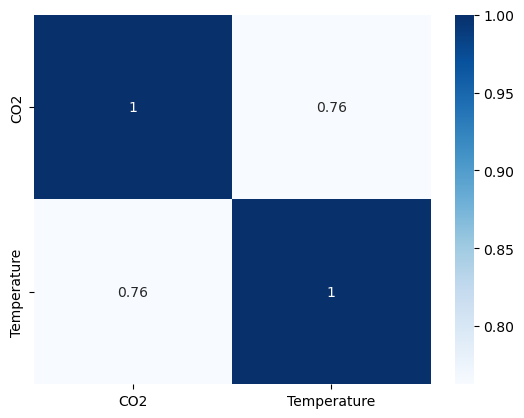

In [151]:
ax = sns.heatmap(merged_df.corr(),annot=True,cmap='Blues')

As we see in the chart that the Both features are very high correlated to each other its above 0.76 that is 76%

Text(0, 0.5, 'CO2')

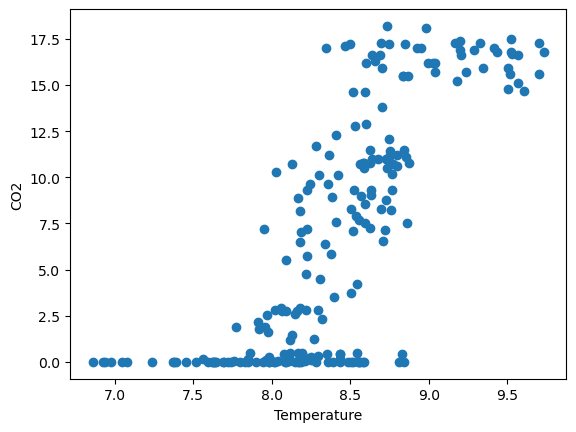

In [152]:
plt.scatter(merged_df['Temperature'],df['CO2'])
plt.xlabel('Temperature')
plt.ylabel('CO2')

As we see in the graph that the relation between co2 and Temperature, it sees that the year is increasing and co2 is also increasing its showing positive corelation between the features

array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

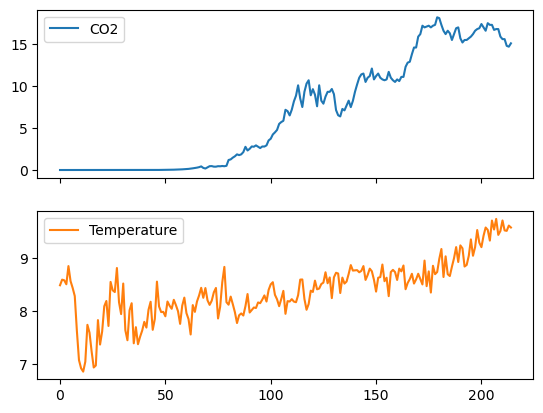

In [153]:
merged_df.plot(subplots=True)

# Section 11: Splitting Data into Train and Test

In [154]:
df

,CO2
Year,
1800-01-01,0.00568
1801-01-01,0.00561
1802-01-01,0.00555
1803-01-01,0.00548
1804-01-01,0.00542
...,...
2010-01-01,15.60000
2011-01-01,15.60000
2012-01-01,14.80000


In [155]:
df_train=df[0:200]

In [156]:
df_train

,CO2
Year,
1800-01-01,0.00568
1801-01-01,0.00561
1802-01-01,0.00555
1803-01-01,0.00548
1804-01-01,0.00542
...,...
1995-01-01,15.90000
1996-01-01,16.20000
1997-01-01,16.60000


In [157]:
df_test=df[200:]

In [158]:
df_test

,CO2
Year,
2000-01-01,17.4
2001-01-01,17.0
2002-01-01,16.6
2003-01-01,17.5
2004-01-01,17.3
2005-01-01,17.3
2006-01-01,16.7
2007-01-01,16.8
2008-01-01,16.8


### we have splitted data into two parts train and test where train data have 200 years data and test data have last 15 years data 

# Section 12: Model Building

### 1. Simple Moving Average

In [159]:
df_ma=df.copy()

In [160]:
train_len=200

In [161]:
df_ma['ma_forecast'] = df_ma['CO2'].rolling(10).mean()

In [162]:
df_ma['ma_forecast'][train_len:] = df_ma['ma_forecast'][train_len-1]

In [163]:
from sklearn.metrics import mean_squared_error

In [164]:
df_ma[train_len:]

,CO2,ma_forecast
Year,,
2000-01-01,17.4,16.0
2001-01-01,17.0,16.0
2002-01-01,16.6,16.0
2003-01-01,17.5,16.0
2004-01-01,17.3,16.0
2005-01-01,17.3,16.0
2006-01-01,16.7,16.0
2007-01-01,16.8,16.0
2008-01-01,16.8,16.0


In [165]:
## Calculating RMSE and MAPE
rmse_ma = mean_squared_error(df_ma['CO2'][train_len:],df_ma['ma_forecast'][train_len:],squared=False).round(2)
rmse_ma

1.0

## In this Simple moving average model the rmse score is getting 1 but as a result the same value is predicting to every future year

##  2.  Simple Exponential Smoothing

In [166]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [167]:
ses_model = SimpleExpSmoothing(df_train["CO2"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = df_test.index[0],end = df_test.index[-1])

C:\Users\karan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


In [168]:
pred_ses

2000-01-01    16.360935
2001-01-01    16.360935
2002-01-01    16.360935
2003-01-01    16.360935
2004-01-01    16.360935
2005-01-01    16.360935
2006-01-01    16.360935
2007-01-01    16.360935
2008-01-01    16.360935
2009-01-01    16.360935
2010-01-01    16.360935
2011-01-01    16.360935
2012-01-01    16.360935
2013-01-01    16.360935
2014-01-01    16.360935
Freq: AS-JAN, dtype: float64

In [169]:
rmse_ses = mean_squared_error(df_test['CO2'],pred_ses,squared=False).round(2)
rmse_ses

0.94

## In this Simple exponential method model aslo the rmse score we gets its nice but the prediction of value is repeating for every future year 

## 3. Holt's Method

In [170]:
from statsmodels.tsa.holtwinters import Holt

In [171]:
holt_model = Holt(df_train["CO2"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_holt = holt_model.predict(start = df_test.index[0],end = df_test.index[-1])

C:\Users\karan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\karan\AppData\Local\Temp\ipykernel_11384\1405556478.py:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(df_train["CO2"]).fit(smoothing_level=0.8, smoothing_slope=0.2)


In [172]:
pred_holt

2000-01-01    17.045447
2001-01-01    17.188569
2002-01-01    17.331691
2003-01-01    17.474813
2004-01-01    17.617935
2005-01-01    17.761057
2006-01-01    17.904179
2007-01-01    18.047301
2008-01-01    18.190423
2009-01-01    18.333545
2010-01-01    18.476667
2011-01-01    18.619789
2012-01-01    18.762911
2013-01-01    18.906033
2014-01-01    19.049155
Freq: AS-JAN, dtype: float64

In [173]:
rmse_holt = mean_squared_error(df_test['CO2'],pred_holt,squared=False).round(2)
rmse_holt

2.28

In [174]:
holt_model = Holt(df_train["CO2"]).fit(smoothing_level=0.7, smoothing_slope=0.2)
pred_holt = holt_model.predict(start = df_test.index[0],end = df_test.index[-1])
rmse_holt = mean_squared_error(df_test['CO2'],pred_holt,squared=False).round(2)
rmse_holt

C:\Users\karan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\karan\AppData\Local\Temp\ipykernel_11384\29593869.py:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(df_train["CO2"]).fit(smoothing_level=0.7, smoothing_slope=0.2)


2.31

In [175]:
holt_model = Holt(df_train["CO2"]).fit(smoothing_level=0.6, smoothing_slope=0.2)
pred_holt = holt_model.predict(start = df_test.index[0],end = df_test.index[-1])
rmse_holt = mean_squared_error(df_test['CO2'],pred_holt,squared=False).round(2)
rmse_holt

C:\Users\karan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\karan\AppData\Local\Temp\ipykernel_11384\298364767.py:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(df_train["CO2"]).fit(smoothing_level=0.6, smoothing_slope=0.2)


2.31

In [176]:
holt_model = Holt(df_train["CO2"]).fit(smoothing_level=0.9, smoothing_slope=0.2)
pred_holt = holt_model.predict(start = df_test.index[0],end = df_test.index[-1])
rmse_holt = mean_squared_error(df_test['CO2'],pred_holt,squared=False).round(2)
rmse_holt

C:\Users\karan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\karan\AppData\Local\Temp\ipykernel_11384\3086518558.py:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(df_train["CO2"]).fit(smoothing_level=0.9, smoothing_slope=0.2)


2.25

## This Holt method model is not predicting same values but as we see the RMSE Score in more than previous models. We have created multiple models based on smoothing level and we are getting that On smoothing level 0.9 the rmse score is getting better

## 4. Holt's Exponential Smoothing

### a. Additive method

In [177]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

In [178]:
hes_add_add = ExponentialSmoothing(df_train['CO2'],seasonal="add",trend="add",seasonal_periods=10).fit()
pred_hes_add_add = hes_add_add.predict(start = df_test.index[0],end = df_test.index[-1])

C:\Users\karan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


In [179]:
rmse_hes_add_add = mean_squared_error(df_test['CO2'],pred_hes_add_add,squared=False).round(2)
rmse_hes_add_add

1.79

In [180]:
hes_add_add = ExponentialSmoothing(df_train['CO2'],seasonal="add",trend="add",seasonal_periods=20).fit()
pred_hes_add_add = hes_add_add.predict(start = df_test.index[0],end = df_test.index[-1])

C:\Users\karan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


In [181]:
rmse_hes_add_add = mean_squared_error(df_test['CO2'],pred_hes_add_add,squared=False).round(2)
rmse_hes_add_add

1.92

In [182]:
hes_add_add = ExponentialSmoothing(df_train['CO2'],seasonal="add",trend="add",seasonal_periods=30).fit()
pred_hes_add_add = hes_add_add.predict(start = df_test.index[0],end = df_test.index[-1])

C:\Users\karan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


In [183]:
rmse_hes_add_add = mean_squared_error(df_test['CO2'],pred_hes_add_add,squared=False).round(2)
rmse_hes_add_add

2.39

In [184]:
hes_add_add = ExponentialSmoothing(df_train['CO2'],seasonal="add",trend="add",seasonal_periods=40).fit()
pred_hes_add_add = hes_add_add.predict(start = df_test.index[0],end = df_test.index[-1])
rmse_hes_add_add = mean_squared_error(df_test['CO2'],pred_hes_add_add,squared=False).round(2)
rmse_hes_add_add

C:\Users\karan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


2.04

In [185]:
hes_add_add = ExponentialSmoothing(df_train['CO2'],seasonal="add",trend="add",seasonal_periods=50).fit()
pred_hes_add_add = hes_add_add.predict(start = df_test.index[0],end = df_test.index[-1])
rmse_hes_add_add = mean_squared_error(df_test['CO2'],pred_hes_add_add,squared=False).round(2)
rmse_hes_add_add

C:\Users\karan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


2.0

## In this Additive model I have created models for different seasonal periods where I am getting that sesonal period of 10 is giving better accuracy than other seasonal periods. But its accuracy score is much more than previous model but its not predicting same value for every year

### b. Multiplicative method

In [186]:
hes_mul_add = ExponentialSmoothing(df_train['CO2'],seasonal="mul",trend="add",seasonal_periods=10).fit() 
pred_hes_mul_add = hes_mul_add.predict(start = df_test.index[0],end = df_test.index[-1])
rmse_hes_mul_add = mean_squared_error(df_test['CO2'],pred_hes_mul_add,squared=False).round(2)
rmse_hes_mul_add

C:\Users\karan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\karan\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


1.47

In [187]:
hes_mul_add = ExponentialSmoothing(df_train['CO2'],seasonal="mul",trend="add",seasonal_periods=50).fit() 
pred_hes_mul_add = hes_mul_add.predict(start = df_test.index[0],end = df_test.index[-1])
rmse_hes_mul_add = mean_squared_error(df_test['CO2'],pred_hes_mul_add,squared=False).round(2)
rmse_hes_mul_add

C:\Users\karan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\karan\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


2.41

In [188]:
hes_mul_add = ExponentialSmoothing(df_train['CO2'],seasonal="mul",trend="add",seasonal_periods=100).fit() 
pred_hes_mul_add = hes_mul_add.predict(start = df_test.index[0],end = df_test.index[-1])
rmse_hes_mul_add = mean_squared_error(df_test['CO2'],pred_hes_mul_add,squared=False).round(2)
rmse_hes_mul_add

C:\Users\karan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\karan\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


7.6

## In this Multiplicative model we created three model based on seasonal period where we get sesonal period of 10 is performing better than other but as we see rmse score is better than addictive method model

## 5. ARIMA model

## Acf Plot

In [189]:
from statsmodels.graphics.tsaplots import plot_acf

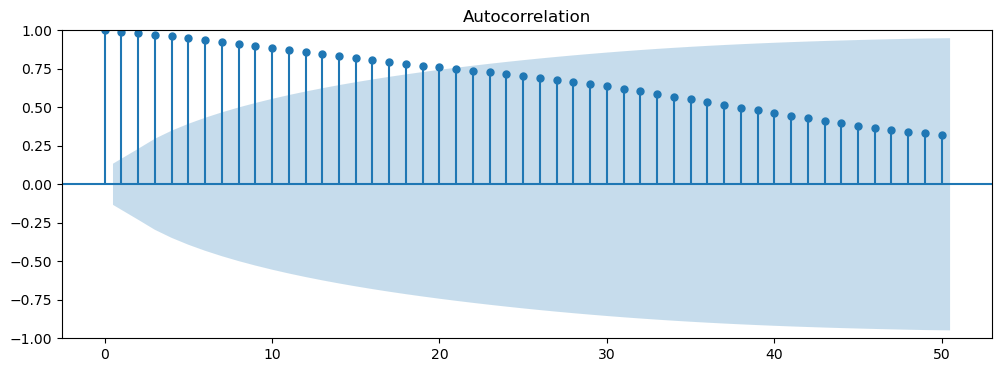

In [190]:
# Show autocorrelation upto lag 20
plt.figure(figsize=(12,4))
acf_plot = plot_acf( df['CO2'],ax=plt.gca(),lags=50)
plt.show()

The above plot shows that auto correlation is significant for lag=1

### PCF plot

In [191]:
from statsmodels.graphics.tsaplots import plot_pacf

C:\Users\karan\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


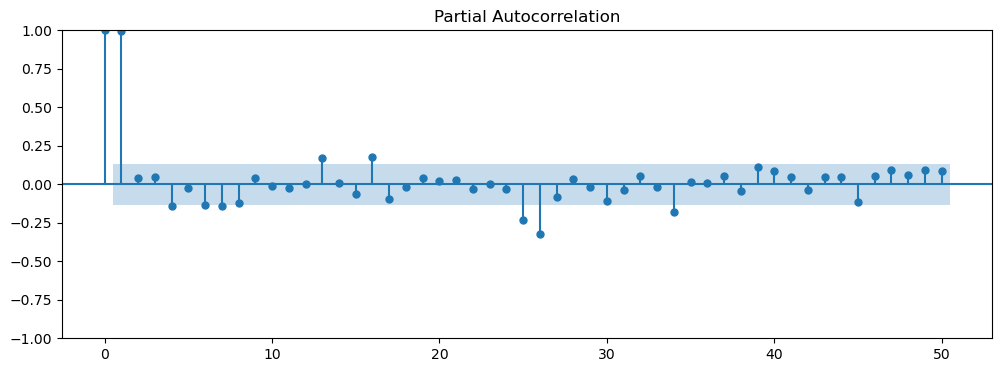

In [192]:
plt.figure(figsize=(12,4))
pacf_plot = plot_pacf( df['CO2'],ax=plt.gca(),lags=50)
plt.show()

In [193]:
from statsmodels.tsa.arima.model import ARIMA

In [194]:
arima = ARIMA(df_train['CO2'], order=(1,1,1)).fit()
pred_arima= arima.predict(start = df_test.index[0],end = df_test.index[-1])

C:\Users\karan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\karan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\karan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


In [195]:
pred_arima

2000-01-01    16.906652
2001-01-01    16.901750
2002-01-01    16.905362
2003-01-01    16.902701
2004-01-01    16.904662
2005-01-01    16.903217
2006-01-01    16.904282
2007-01-01    16.903497
2008-01-01    16.904075
2009-01-01    16.903649
2010-01-01    16.903963
2011-01-01    16.903732
2012-01-01    16.903902
2013-01-01    16.903777
2014-01-01    16.903869
Freq: AS-JAN, Name: predicted_mean, dtype: float64

In [196]:
rmse_arima = mean_squared_error(df_test['CO2'],pred_arima,squared=False).round(2)
rmse_arima

1.1

## As we see in the Arima model The rmse score is better than other models and prediction results are also well the model is not predicting same value for every year. The Model is predicting in Increament trend

# 6. SARIMA Model

In [197]:
import statsmodels.api as sm

In [198]:
order = (1, 1, 1)
seasonal_order = (1, 1, 1, 12)

In [199]:
model_sarima = sm.tsa.statespace.SARIMAX(df_train, order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
results = model_sarima.fit()

C:\Users\karan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\karan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\karan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [200]:
predictions_sarima = results.get_forecast(steps=15*12)

In [201]:
predicted_values = predictions_sarima.predicted_mean

In [202]:
predicted_values[:15]

2000-01-01    17.211520
2001-01-01    17.467546
2002-01-01    17.678317
2003-01-01    17.770384
2004-01-01    17.931390
2005-01-01    17.588187
2006-01-01    17.671777
2007-01-01    17.946613
2008-01-01    18.178146
2009-01-01    18.075145
2010-01-01    17.981949
2011-01-01    18.160326
2012-01-01    18.548770
2013-01-01    18.774159
2014-01-01    18.693380
Freq: AS-JAN, Name: predicted_mean, dtype: float64

In [203]:
rmse_sarima = mean_squared_error(df_test['CO2'],predicted_values[:15],squared=False).round(2)
rmse_sarima

2.11

# In Sarima model It also performing better but Arima model is giving best result 

## Choosing the best model

In [204]:
models=['simple_moving_average','simple_expo_smoothing','Holt','Holt_additive','Holt_multiplicative','ARIMA','sarima']
rmse=[rmse_ma,rmse_ses,rmse_holt,rmse_hes_add_add,rmse_hes_mul_add,rmse_arima,rmse_sarima]
d={'Models':models,'Rmse':rmse}
df_model=pd.DataFrame(d)
df_model

,Models,Rmse
0,simple_moving_average,1.00
1,simple_expo_smoothing,0.94
2,Holt,2.25
3,Holt_additive,2.00
4,Holt_multiplicative,7.60
5,ARIMA,1.10
6,sarima,2.11


In [205]:
df_model.sort_values(by='Rmse')

,Models,Rmse
1,simple_expo_smoothing,0.94
0,simple_moving_average,1.00
5,ARIMA,1.10
3,Holt_additive,2.00
6,sarima,2.11
2,Holt,2.25
4,Holt_multiplicative,7.60


## 1. As we see that simple exponential smoothing model is giving best result But we see that its predicting same result

## 2. So we decided to go with Arima model because of its Average result.

## 3. In Trend analysis we see that every year Co2 level is increasing and the result we are getting from Arima level Its showing Increament and ARIMA model RMSE score is also good it is 1.10 its much better than other models.

# Using Facebook Prophet Model

In [206]:
#pip install prophet

In [207]:
df_p=pd.read_excel('CO2 dataset.xlsx')
df_p=df_p[0:200]

In [208]:
df_p

,Year,CO2
0,1800,0.00568
1,1801,0.00561
2,1802,0.00555
3,1803,0.00548
4,1804,0.00542
...,...,...
195,1995,15.90000
196,1996,16.20000
197,1997,16.60000
198,1998,16.80000


In [209]:
df_p = df_p.rename(columns={'Year': 'ds', 'CO2': 'y'})
df_p['ds'] = pd.to_datetime(df_p['ds'], format='%Y')

In [210]:
df_p

,ds,y
0,1800-01-01,0.00568
1,1801-01-01,0.00561
2,1802-01-01,0.00555
3,1803-01-01,0.00548
4,1804-01-01,0.00542
...,...,...
195,1995-01-01,15.90000
196,1996-01-01,16.20000
197,1997-01-01,16.60000
198,1998-01-01,16.80000


13:54:10 - cmdstanpy - INFO - Chain [1] start processing
13:54:10 - cmdstanpy - INFO - Chain [1] done processing


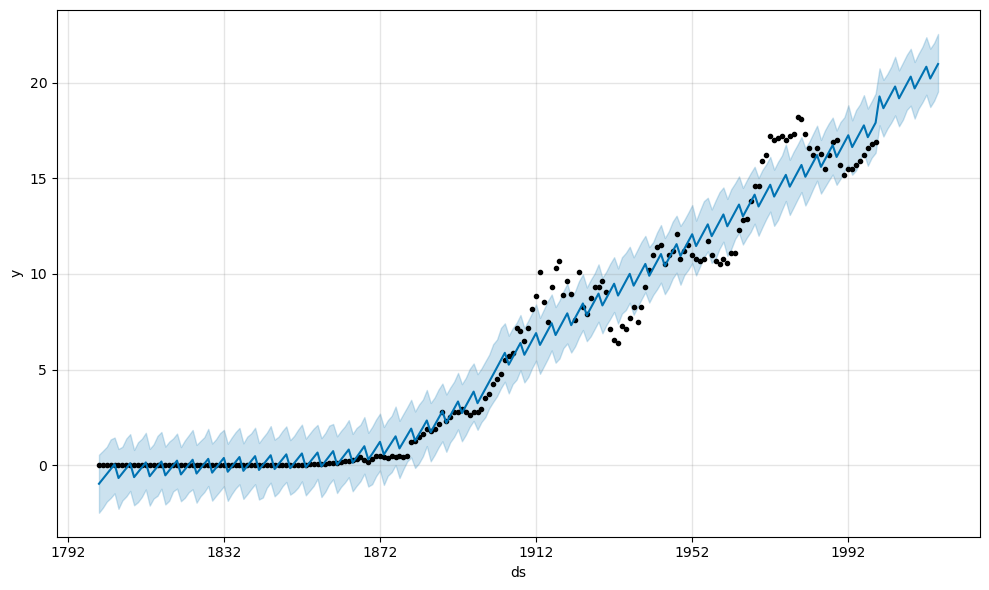

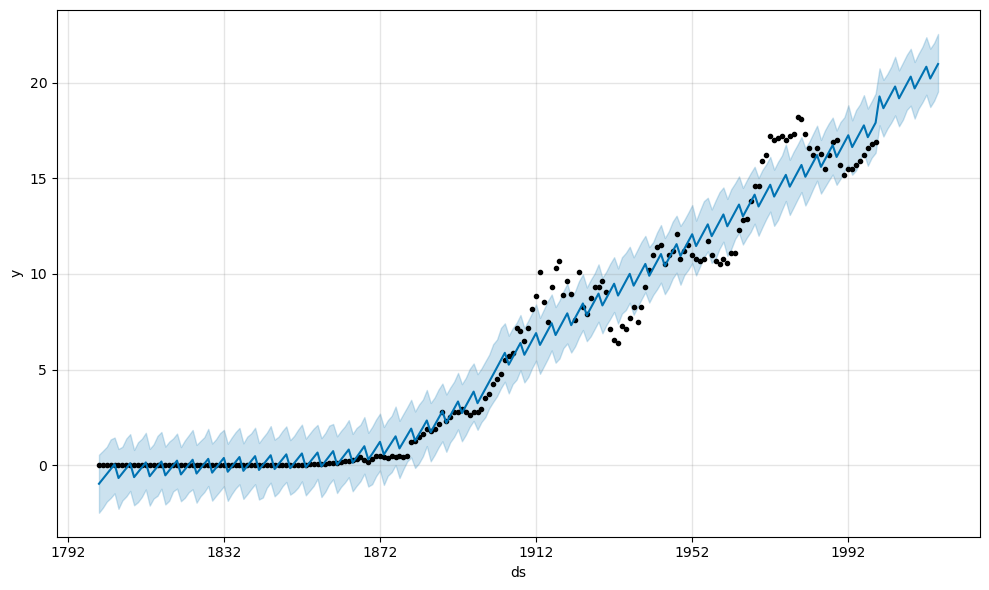

In [211]:
from prophet import Prophet
# Create and fit the Prophet model
model = Prophet()
model.fit(df_p)

# Generate future dates for prediction
future = model.make_future_dataframe(periods=16,freq='Y')

# Make predictions
forecast = model.predict(future)

# Plot the results
model.plot(forecast)


In [212]:
forecast[201:]

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
201,2000-12-31,17.624054,17.189275,20.150043,17.623647,17.624725,1.044216,1.044216,1.044216,1.044216,1.044216,1.044216,0.0,0.0,0.0,18.668270
202,2001-12-31,17.753345,17.593410,20.456408,17.751066,17.756095,1.293756,1.293756,1.293756,1.293756,1.293756,1.293756,0.0,0.0,0.0,19.047101
203,2002-12-31,17.882636,17.909955,20.842151,17.877577,17.888846,1.542733,1.542733,1.542733,1.542733,1.542733,1.542733,0.0,0.0,0.0,19.425369
204,2003-12-31,18.011928,18.290140,21.357235,18.002659,18.023838,1.790841,1.790841,1.790841,1.790841,1.790841,1.790841,0.0,0.0,0.0,19.802769
205,2004-12-31,18.141573,17.723716,20.647650,18.127838,18.158096,1.044216,1.044216,1.044216,1.044216,1.044216,1.044216,0.0,0.0,0.0,19.185789
206,2005-12-31,18.270864,18.063994,21.052572,18.250108,18.293505,1.293756,1.293756,1.293756,1.293756,1.293756,1.293756,0.0,0.0,0.0,19.564620
207,2006-12-31,18.400156,18.578957,21.460336,18.373251,18.429443,1.542733,1.542733,1.542733,1.542733,1.542733,1.542733,0.0,0.0,0.0,19.942889
208,2007-12-31,18.529447,18.801735,21.773667,18.496724,18.564527,1.790841,1.790841,1.790841,1.790841,1.790841,1.790841,0.0,0.0,0.0,20.320289
209,2008-12-31,18.659093,18.125547,21.083688,18.618788,18.701396,1.044216,1.044216,1.044216,1.044216,1.044216,1.044216,0.0,0.0,0.0,19.703309
210,2009-12-31,18.788384,18.642721,21.512157,18.742409,18.838886,1.293756,1.293756,1.293756,1.293756,1.293756,1.293756,0.0,0.0,0.0,20.082140


In [213]:
predict_low=forecast['yhat_lower']

In [214]:
predict=forecast['yhat']

In [215]:
predict_high=forecast['yhat_upper']

In [216]:
rmse_low = mean_squared_error(df_test['CO2'],predict_low[201:],squared=False).round(2)
rmse_low

2.58

In [217]:
rmse_medium = mean_squared_error(df_test['CO2'],predict[201:],squared=False).round(2)
rmse_medium

3.88

In [218]:
rmse_high = mean_squared_error(df_test['CO2'],predict_high[201:],squared=False).round(2)
rmse_high

5.29

## We try different more models to check that can we get more better result than arima model As we see result of the facebook prophet model and we get that Arima model is performing better than others

# Final Model

In [224]:
Model = ARIMA(df, order=(1,1,1)).fit()

C:\Users\karan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\karan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\karan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


In [228]:
Model.forecast()[0]

15.094813616654687

In [221]:
#dump(Model, open('final_model.sav', 'wb'))